L'objectif de cette étude est de tracer différents indicateurs à l'échellle départementale

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium

In [18]:
#Importation des données INSEE
df=pd.read_excel('Donnees_departements.xlsx',header=3)
#df = df.replace("N/A - résultat non disponible", 0)

#Importation des données pn2v
df_pn2v=pd.read_excel('pn2v.xlsx')
nouveaux_noms_columns = {'Numéro': 'Code'}
df_pn2v = df_pn2v.rename(columns=nouveaux_noms_columns)
df_pn2v['Code'] = df_pn2v['Code'].astype(str)
df=pd.merge(df,df_pn2v,on='Code')

#Importation des données superficie
df_superficie=pd.read_excel('superficies.xlsx',header=4)
nouveaux_noms_columns = {'codgeo': 'Code','superf_choro': 'Superficie'}
df_superficie = df_superficie.rename(columns=nouveaux_noms_columns)
df_superficie=df_superficie[df_superficie['an']==2020]
df_superficie=df_superficie.drop(columns=['libgeo','an'])
df=pd.merge(df,df_superficie,on="Code")

#Importation des données supplémentaires prix
df_supp=pd.read_excel('Donnees_supp.xlsx',sheet_name='prix',header=0)
df_supp=df_supp.drop(columns=['Libellé'])
df_supp['Code'] = df_supp['Code'].astype(str)
df=pd.merge(df,df_supp,on="Code")

#Importation des données supplémentaires pluie
df_supp=pd.read_excel('Donnees_supp.xlsx',sheet_name='pluie',header=0)
df_supp=df_supp.drop(columns=['Libellé'])
df_supp['Code'] = df_supp['Code'].astype(str)
df=pd.merge(df,df_supp,on="Code")

#Importation des données supplémentaires soleil
df_supp=pd.read_excel('Donnees_supp.xlsx',sheet_name='soleil',header=0)
df_supp=df_supp.drop(columns=['Libellé'])
df_supp['Code'] = df_supp['Code'].astype(str)
df=pd.merge(df,df_supp,on="Code")

#Importation des données supplémentaires ville
df_supp=pd.read_excel('Donnees_supp.xlsx',sheet_name='ville',header=0)
df_supp=df_supp.drop(columns=['Libellé'])
df_supp['Code'] = df_supp['Code'].astype(str)
df=pd.merge(df,df_supp,on="Code")

#Importation des données supplémentaires biodiv
df_supp=pd.read_excel('donnees_biodiv.xlsx',header=0)
df_supp['Code'] = df_supp['Code'].astype(str)
df=pd.merge(df,df_supp,on="Code")

# Charger la carte des départements de France
carte_departements= gpd.read_file("carte_departements.geojson")
nouveaux_noms_columns = {'code': 'Code', 'nom': 'Libellé'}
carte_departements = carte_departements.rename(columns=nouveaux_noms_columns)
df_geo=pd.merge(df,carte_departements,on="Code")
df_geo=df_geo.drop(columns=['Libellé_y','Département'])
df_geo=df_geo.rename(columns={'Libellé_x':'Libellé'})

# Liste des colonnes à exclure de la conversion en flottants
colonnes_exclues = ['Tier Moyen', 'Code', 'Libellé', 'geometry','Région','Préfecture','Commentaire','Plus grande ville']

# Liste des colonnes à convertir en flottants
colonnes_a_convertir = [colonne for colonne in df_geo.columns if colonne not in colonnes_exclues]

# Remplacer les valeurs 'N/A - résultat non disponible' par NaN
df_geo[colonnes_a_convertir] = df_geo[colonnes_a_convertir].replace('N/A - résultat non disponible', np.nan)

# Convertir les colonnes en float
df_geo[colonnes_a_convertir] = df_geo[colonnes_a_convertir].astype(float)

liste_outremer = ['971', '972', '973','974','976']
df_geo = df_geo.drop(df_geo[df_geo['Code'].isin(liste_outremer)].index)

In [3]:
df_geo.head(20)


,Code,Libellé,Estimations de population 2024,Part des emplois non sal. dans le nb d’emplois au LT 2020,Densité de population (historique depuis 1876) 2020,Part des pers. âgées de - 15 ans 2020,Part des pers. âgées de 65 ans ou + 2020,Indice de vieillissement 2020,Espérance de vie des femmes à la naissance 2023,Espérance de vie des hommes à la naissance 2023,...,Heures d'ensoleillement en 2022,Heures d'ensoleillement en 2021,Heures d'ensoleillement moyennes,Population de la Préfecture,Population de l'agglomération (Préfecture),Plus grande ville,Population de la Plus grande ville,Population de l'agglomération (Plus grande ville),Prix m2 moyen préfecture,geometry
0,01,Ain,679498.0,13.6,114.2,19.8,18.0,69.9,86.2,81.2,...,2398.0,1988.0,2168.666667,40837.0,160912.0,Bourg-en-Bresse,40837.0,160912.0,2250.0,"POLYGON ((4.78021 46.17668, 4.78024 46.18905, ..."
1,02,Aisne,521632.0,11.8,71.9,18.6,20.7,83.0,83.9,77.5,...,2235.0,1887.0,1974.333333,24157.0,66453.0,Saint-Quentin,54991.0,120189.0,1750.0,"POLYGON ((3.17296 50.01131, 3.17382 50.01186, ..."
2,03,Allier,332708.0,15.2,45.7,14.9,27.8,135.9,84.9,79.2,...,2246.0,1904.0,2052.666667,19427.0,64418.0,Montluçon,369.0,104402.0,1500.0,"POLYGON ((3.03207 46.79491, 3.03424 46.79080, ..."
3,04,Alpes-de-Haute-Provence,168161.0,21.4,23.9,15.6,26.3,125.6,85.3,80.5,...,2853.0,2562.0,2753.333333,16164.0,37624.0,Digne-les-Bains,16164.0,37624.0,1750.0,"POLYGON ((5.67604 44.19143, 5.67817 44.19051, ..."
4,05,Hautes-Alpes,141661.0,21.6,25.3,15.6,25.3,120.5,87.0,80.7,...,2652.0,2439.0,2327.000000,40078.0,76439.0,Gap,40078.0,76439.0,2150.0,"POLYGON ((6.26057 45.12685, 6.26417 45.12641, ..."
5,06,Alpes-Maritimes,1119571.0,18.0,255.3,15.7,24.6,116.0,86.1,80.4,...,2952.0,2703.0,2855.000000,344064.0,1006274.0,Nice,344064.0,1006274.0,6000.0,"MULTIPOLYGON (((7.06711 43.51365, 7.06665 43.5..."
6,07,Ardèche,336501.0,19.2,59.6,16.4,25.2,115.4,85.9,80.6,...,2556.0,2243.0,2373.000000,8808.0,59757.0,Annonay,1686.0,88756.0,1750.0,"POLYGON ((4.48313 45.23645, 4.48790 45.23218, ..."
7,08,Ardennes,265737.0,13.1,51.6,17.5,21.8,93.2,84.4,78.8,...,2142.0,1966.0,1943.666667,46599.0,74223.0,Charleville-Mézières,46599.0,74223.0,1500.0,"POLYGON ((4.23316 49.95775, 4.23690 49.95858, ..."
8,09,Ariège,155813.0,20.0,31.5,15.3,26.5,129.5,84.6,79.3,...,2200.0,1924.0,2034.000000,9982.0,50542.0,Pamiers,15911.0,48048.0,1500.0,"POLYGON ((1.68842 43.27355, 1.69139 43.27173, ..."
9,10,Aube,312730.0,13.6,51.9,18.2,21.6,88.4,84.9,78.8,...,2263.0,2215.0,2139.333333,60105.0,180118.0,Troyes,60105.0,180118.0,1750.0,"POLYGON ((3.41479 48.39027, 3.41555 48.39373, ..."


In [19]:
df_geo.columns

Index(['Code', 'Libellé', 'Estimations de population 2024',
       'Part des emplois non sal. dans le nb d’emplois au LT 2020',
       'Densité de population (historique depuis 1876) 2020',
       'Part des pers. âgées de - 15 ans 2020',
       'Part des pers. âgées de 65 ans ou + 2020',
       'Indice de vieillissement 2020',
       'Espérance de vie des femmes à la naissance 2023',
       'Espérance de vie des hommes à la naissance 2023',
       'Médiane du niveau de vie 2021', 'Taux de pauvreté 2021',
       'Part des impôts dans le rev. disp. 2021',
       'Part des non ou peu diplômés dans la pop. non scolarisée de 15 ans ou + 2020',
       'Part des rés. secondaires (y compris les logements occasionnels) dans le total des logements 2020',
       'Part des rés. principales construites avant 1946 2020',
       'Part des agriculteurs expl. dans le nb d’emplois au LT 2020',
       'Part des artisans, commerçants, chefs d’ent. dans le nb d’emplois au LT 2020',
       'Part des cadres 

In [13]:
#Opération sur les variables
df_geo["Nombre de médecins généralistes pour 1000 habitants"]=df_geo['Médecin généraliste (en nombre) 2021']*1000/df_geo['Estimations de population 2024']
df_geo["Nombre d'écoles élémentaires pour 1000 habitants"]=df_geo['École élémentaire (en nombre) 2021']*1000/df_geo['Estimations de population 2024']
df_geo["Nombre de lycées pour 1000 habitants"]=df_geo['Lycée (en nombre) 2021']*1000/df_geo['Estimations de population 2024']

df_geo["Nombre de médecins généralistes par km2"]=df_geo['Médecin généraliste (en nombre) 2021']/df_geo['Superficie']
df_geo["Nombre d'écoles élémentaires par km2"]=df_geo['École élémentaire (en nombre) 2021']/df_geo['Superficie']
df_geo["Nombre de lycées par km2"]=df_geo['Lycée (en nombre) 2021']/df_geo['Superficie']

df_geo["Note totale par Prix m2 moyen appartement"]=df_geo['Note totale']/df_geo['Prix m2 moyen appartement']
df_geo["Note totale par Prix m2 moyen maison"]=df_geo['Note totale']/df_geo['Prix m2 moyen maison']
df_geo["Note totale par Loyer m2 moyen maison"]=df_geo['Note totale']/df_geo['Loyer m2 moyen maison']
df_geo["Note totale par Loyer m2 moyen appartement"]=df_geo['Note totale']/df_geo['Loyer m2 moyen appartement']
df_geo["Note totale par prix m2 moyen préfecture"]=df_geo['Note totale']/df_geo['Prix m2 moyen préfecture']

df_geo["Rapport Achat/Location appartement"]=df_geo['Prix m2 moyen appartement']/df_geo['Loyer m2 moyen appartement']
df_geo["Rapport Achat/Location maison"]=df_geo['Prix m2 moyen maison']/df_geo['Loyer m2 moyen maison']

df_geo["Nombre de monuments historiques pour 1000 habitants"]=df_geo['Nombre de monuments historiques']*1000/df_geo['Estimations de population 2024']
df_geo["Nombre de monuments historiques par km2"]=df_geo['Nombre de monuments historiques']/df_geo['Superficie']




In [14]:
def n_minimum(liste, n):
    # Si la liste est vide ou si n est plus grand que la taille de la liste, retourner None
    if len(liste) < n:
        return None
    
    # Initialiser une liste pour stocker les n premiers minimums
    minimums = [float('inf')] * n
    
    # Parcourir la liste pour trouver les n premiers minimums
    for element in liste:
        for i in range(n):
            if element < minimums[i]:
                minimums.insert(i, element)
                minimums.pop()
                break
    
    # Retourner le n-ième minimum trouvé
    return minimums[n-1]

def n_maximum(liste, n):
    # Si la liste est vide ou si n est plus grand que la taille de la liste, retourner None
    if len(liste) < n:
        return None
    
    # Initialiser une liste pour stocker les n premiers maximums
    maximums = [-float('inf')] * n
    
    # Parcourir la liste pour trouver les n premiers maximums
    for element in liste:
        for i in range(n):
            if element > maximums[i]:
                maximums.insert(i, element)
                maximums.pop()
                break
    
    # Retourner le n-ième maximum trouvé
    return maximums[n-1]


In [26]:
#choix de la variable d'intérèt
var= "Poissons"

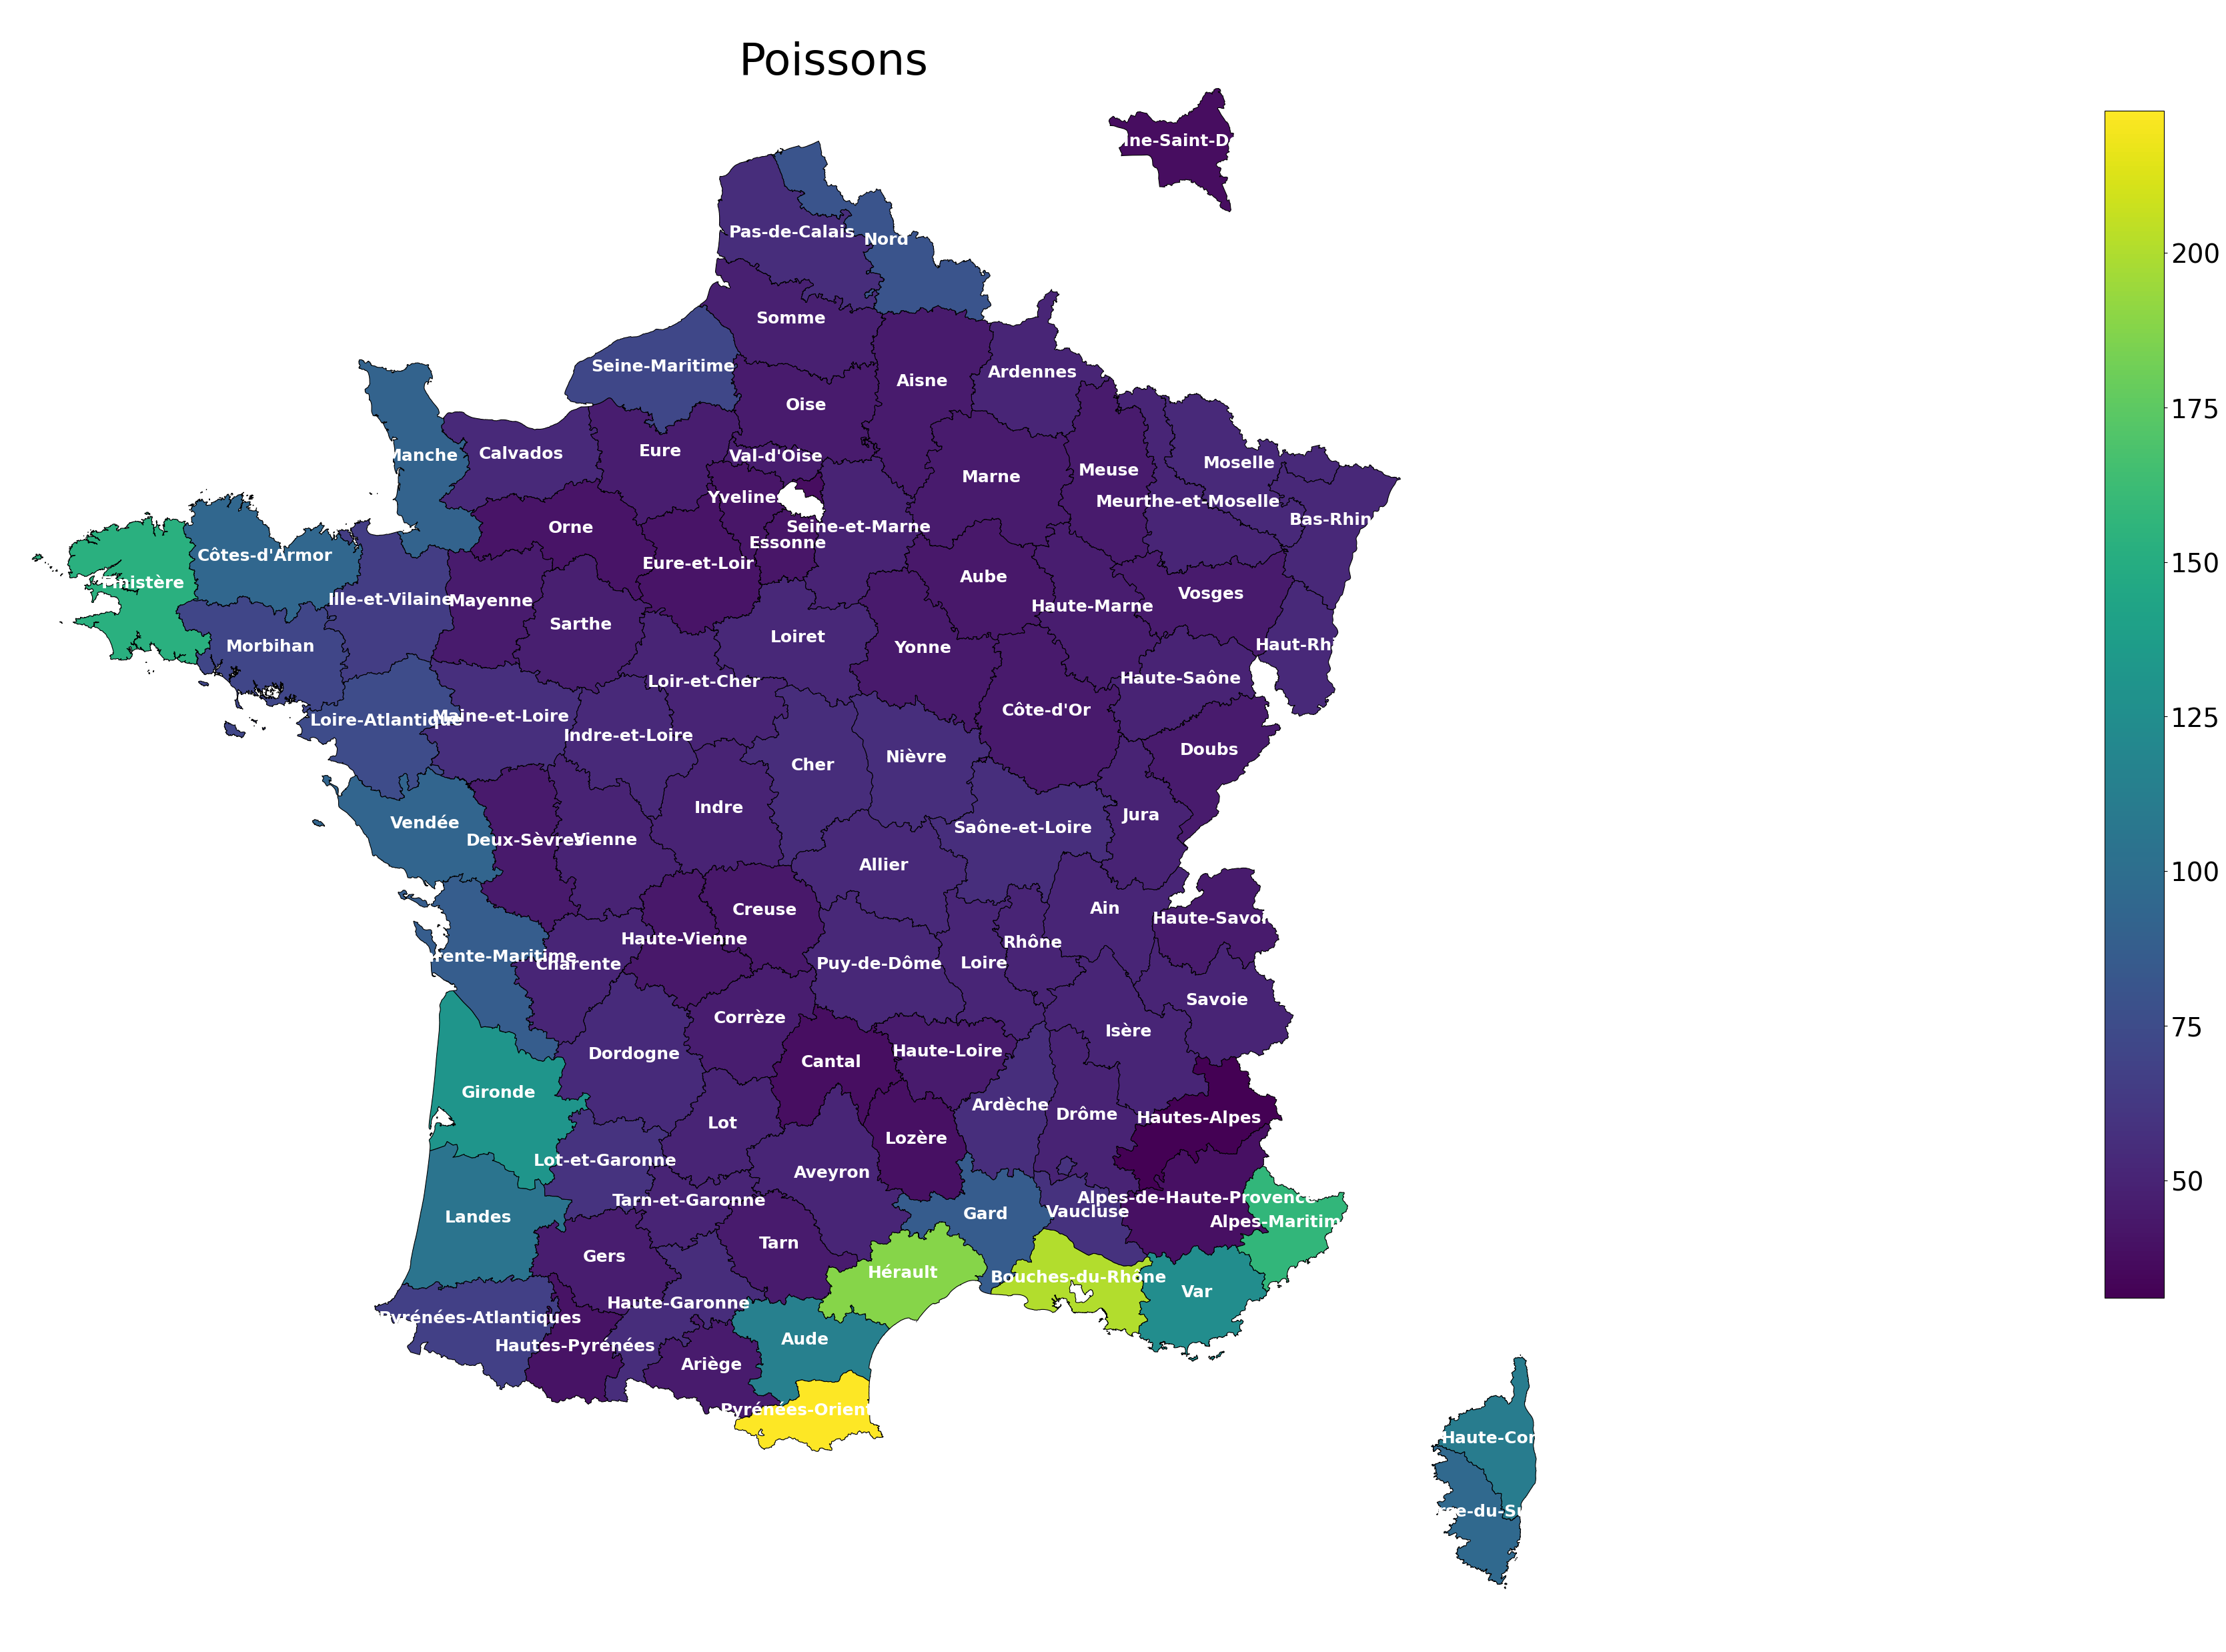

                    Libellé  Poissons
66      Pyrénées-Orientales     223.0
12         Bouches-du-Rhône     201.0
34                  Hérault     188.0
5           Alpes-Maritimes     157.0
27                Finistère     153.0
..                      ...       ...
3   Alpes-de-Haute-Provence      39.0
48                   Lozère      39.0
14                   Cantal      38.0
90        Seine-Saint-Denis      37.0
4              Hautes-Alpes      31.0

[92 rows x 2 columns]


In [27]:

gdf = gpd.GeoDataFrame(df_geo)

# Créer une nouvelle figure avec deux axes
fig, ax1 = plt.subplots( figsize=(40, 40))

# Choisir un système de coordonnées projetées approprié (par exemple, EPSG:3857 pour les coordonnées Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Calculer les centroïdes des géométries projetées
gdf['centroid'] = gdf['geometry'].centroid

# Extraire les coordonnées x et y des centroïdes projetés
gdf['centroid_x'] = gdf['centroid'].x
gdf['centroid_y'] = gdf['centroid'].y

liste_NA=gdf[gdf[var].isna()]['Code']
gdf_NA=gdf[gdf['Code'].isin(liste_NA)]
gdf=gdf[~gdf['Code'].isin(liste_NA)]

# Liste des régions à inclure
dpt_a_inclure = ['75', '94', '92', '93']

# Filtrer les départements pour inclure ceux des régions spécifiées
gdf_select = gdf[gdf['Code'].isin(dpt_a_inclure)]
gdf_noselect = gdf[~gdf['Code'].isin(dpt_a_inclure)]
gdf_NA_select = gdf_NA[gdf_NA['Code'].isin(dpt_a_inclure)]
gdf_select=gdf_select[~gdf_select['Code'].isin(liste_NA)]

# Ajuster les limites de l'axe pour la première carte
ax1.set_xlim(-600000, 1200000)
ax1.set_ylim(5000000, 6700000)

# Définir les coordonnées de ax2 par rapport à ax1
left, bottom, width, height = 0.55, 0.5, 0.5, 0.5  # ajustez ces valeurs selon vos besoins

# Créer un nouvel axe ax2 à des coordonnées spécifiques par rapport à ax1
ax2 = fig.add_axes([left, bottom, width, height])

# Ajuster les limites de l'axe pour la première carte
ax2.set_xlim(200000, 500000)
ax2.set_ylim(6200000, 6300000)

ax1.set_title("Carte des départements de France", fontsize=48)

ax1.axis('off')
ax2.axis('off')

cmap_choice='viridis'

# Déterminer les valeurs minimales et maximales de l'indice de vieillissement
n=1;
m=1;
val_min = n_minimum(gdf[var], n)
val_max = n_maximum(gdf[var], m)

if val_min==0  or val_min==1:
    val_min=0
    val_max=5
    
# Tracer la carte des départements en utilisant la colonne "Indice de vieillissement 2020" pour la coloration
if not gdf.empty :
    gdf.plot(column=var, cmap=cmap_choice, legend=False,
         linewidth=0.8, edgecolor='black', ax=ax1,vmin=val_min,vmax=val_max)
if not gdf_NA.empty :
    gdf_NA.plot(color='black', ax=ax1,vmin=val_min,vmax=val_max)

if not gdf_select.empty :
    gdf_select.plot(column=var, cmap=cmap_choice, legend=False,
         linewidth=0.8, edgecolor='black', ax=ax2,vmin=val_min,vmax=val_max)
if not gdf_NA_select.empty :
    gdf_NA_select.plot(color='black', ax=ax2,vmin=val_min,vmax=val_max)

# Ajouter une colorbar
sm = plt.cm.ScalarMappable(cmap=cmap_choice,norm=plt.Normalize(vmin=val_min, vmax=val_max))

cbar = fig.colorbar(sm, ax=[ax1,ax2], shrink=0.5)  # Réduire la taille de la colorbar
cbar.ax.tick_params(labelsize=28)  # Augmenter la taille de la police de la colorbar

for x, y, label in zip(gdf_noselect.geometry.centroid.x, gdf_noselect.geometry.centroid.y, gdf_noselect['Libellé']):
    ax1.text(x, y, label, fontsize=18, ha='center',color="white",fontweight='bold')
    
for x, y, label in zip(gdf_select.geometry.centroid.x, gdf_select.geometry.centroid.y, gdf_select['Libellé']):
    ax2.text(x, y, label, fontsize=18, ha='center',color="white",fontweight='bold')
    
# Ajouter un titre à la carte
ax1.set_title(var,fontsize=48)

# Afficher la figure
plt.show()

gdf_sorted=gdf.sort_values(by=var, ascending=False)
colonnes_selectionnees = ['Libellé', var]
valeurs_selectionnees = gdf_sorted[colonnes_selectionnees]
print(valeurs_selectionnees)

In [ ]:
# Regrouper les données par la colonne 'Région' et calculer la moyenne de la note totale
mean_var = df_geo.groupby('Région')[var].mean()

# Créer un nouveau DataFrame avec les moyennes
mean_var_df = pd.DataFrame(mean_var)

# Renommer la colonne pour plus de clarté
mean_var_df.rename(columns={f'{var}': f'{var} moyenne'}, inplace=True)

# Ordonner le DataFrame par ordre croissant selon la note totale moyenne
mean_var_df_sorted = mean_var_df.sort_values(by=f'{var} moyenne', ascending=True)

# Afficher le DataFrame ordonné
print(mean_var_df_sorted)

In [ ]:
# Créez une carte
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)

# Ajoutez une couche choroplèthe pour représenter la variable choisie
choropleth = folium.Choropleth(
    geo_data='carte_departements.geojson',  # Assurez-vous d'avoir le fichier GeoJSON pour les départements français
    name='choropleth',
    data=df_geo,
    columns=['Libellé',var],
    key_on='feature.properties.nom',  # Clé correcte pour faire correspondre les départements du GeoJSON aux données
    fill_color='YlGn',  # Choisissez une palette de couleurs appropriée
    fill_opacity=0.6,
    line_opacity=0.2,
    legend_name='Variable à afficher',
     highlight=True,  # Activez le survol
    tooltip=folium.GeoJsonTooltip(fields=['nom'], aliases=['Libellé']),
).add_to(m)


# Affichez la carte
display(m)
m.save('carte_interactive.html')


In [ ]:
df_geo[df_geo['Libellé']=='Haute-Vienne'][var]